# Nagradne točke

Oddelek za gospodarstvo in motorni promet pri Mestni občini Ljubljana je za popularizacijo kolesarjenja uvedel sistem nagradnih točk za uporabo različnih veščin. Vožnja po travi je vredna tri točke, divjanje med pešci štiri točke, vožnja po avtocesti deset točk in tako naprej. Kolesar, ki zbere določeno število nagradnih točk, dobi vozniško dovoljenje za motorno vozilo kategorije C (+ koncesijo za parkiranje na pločniku).

Točkovanje:

- črepinje: 1,
- robnik: 1,
- lonci: 1,
- gravel: 2,
- bolt: 2,
- rodeo: 2,
- trava: 3,
- pešci: 4,
- stopnice: 6,
- avtocesta: 10.

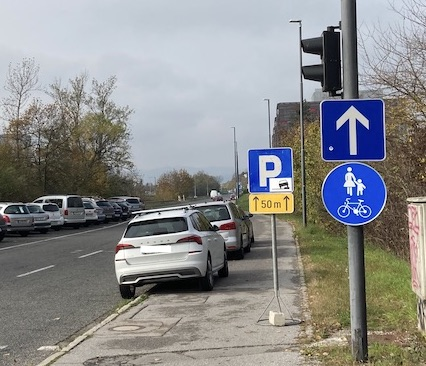

Nekaj sprememb v primerjavi z nalogo [Načrtovanje poti](https://ucilnica.fri.uni-lj.si/mod/assign/view.php?id=50891):

- Veščine so iste kot zadnjič, le da uporabljamo samo okrajšave.
- Ključi v zemljevidu so enaki, vendar sta v zemljevidu že obe smeri, tako da se vam ni potrebno zafrkavati s funkcijo `dvosmerni_zemljevid`.
- Vrednosti v zemljevidu so množice okrajšanih veščin, na primer `{"pešci", "avtocesta"}`. (Da bi neka povezava zahtevala divjanje med pešci na avtocesti, mogoče zveni hecno, a glede na to, da MOL že od pomladi odkriva, da so pločniki lahko tudi parkirišča, tudi preusmeritev prometa na pločnike ne bi bila preveliko presenečenje.)

<p style="clear: both">Pri reševanju mi boste hvaležni za spodnjo sliko.</p>

<center>
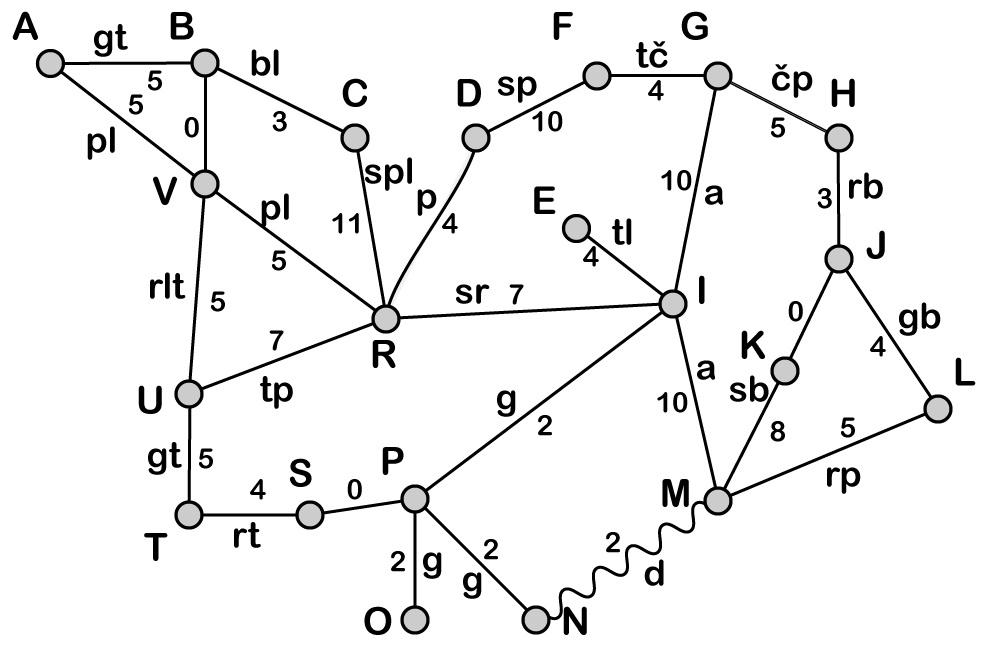</center>

## Za oceno 6

- Napiši funkcijo `vrednost_povezave(povezava, zemljevid)`, ki vrne število nagradnih točk, ki jih dobi kolesar, če prevozi `povezavo`. Povezava je podana kot terka z imeni križišč, na primer `("A", "B")`, torej v enaki obliki kot ključi zemljevida. Število točk je enako vsoti točk, ki jih dobi za potrebne veščine. Če so potrebne veščine za neko povezavo `{"pešci", "avtocesta", "bolt"}`, mora funkcija vrniti `16` (to je, `4 + 10 + 2`).

- Napiši funkcijo `najboljsa_povezava(zemljevid)`, ki vrne povezavo, za katero dobimo največ točk. Če je takšnih povezav več, lahko vrne poljubno izmed njih. (Vedno bosta vsaj dve, namreč ena in ista povezava v eno in drugo smer.)

- Napiši funkcijo `vrednost_poti(pot, zemljevid)`, ki vrne število nagradnih točk, ki jih dobi kolesar za določeno pot, to je, vsoto nagradnih točk za vse povezave na tej poti. Če mora na poti večkrat uporabiti različno veščino, dobi točke za vsako uporabo. Pot je podana v obliki niza, kot smo že vajeni. Predpostaviti smete, da je pot možna.

### Rešitev

#### `vrednost_povezave`

`vrednost_povezave` (skoraj) zahteva, da se spomnite učinkovitega načina za shranjevanje vrednosti posameznih veščin: uporabiti morate slovar, katerega ključi so veščine, vrednosti pa število točk, ki jih prinese njihova uporaba.

Sestavimo ga lahko tako:

In [1]:
tocke = {"gravel": 2, "trava": 3, "lonci": 1, "bolt": 2,
         "pešci": 4, "stopnice": 6, "avtocesta": 10,
         "črepinje": 1, "robnik": 1, "rodeo": 2}

Če smo bolj lene sorte, ko gre za tipkanje narekovajev in vejic in dvopičij, pa tako:

In [3]:
tocke = dict(gravel=2, trava=3, lonci=1, bolt=2, pešci=4,
             stopnice=6, avtocesta=10, črepinje=1, robnik=1,
             rodeo=2)

Ker tule kličemo `dict` s poimenovanimi argumenti, ta trik žal vžge le, če so ključi slovarja veljavna imena v Pythonu - začeti se morajo s črko ter vsebovati le črke, števke in podčrtaje.

Kakorkoli, funkcija je potem preprosto

In [4]:
def vrednost_povezave(povezava, zemljevid):
    vrednost = 0
    for vescina in zemljevid[povezava]:
        vrednost += tocke[vescina]
    return vrednost

Ali, če znamo:

In [5]:
def vrednost_povezave(povezava, zemljevid):
    return sum(tocke[vescina] for vescina in zemljevid[povezava])

Oboje je spodobno, čeprav je drugo spodobnejše. Nespodobno pa je tole:

In [6]:
def vrednost_povezave(povezava, zemljevid):
    for ključ, vrednost in zemljevid.items():
        if ključ == povezava:
            vescine = vrednost
            break
            
    vsota = 0
    for ključ, vrednost in tocke.items():
        for vescina in vescine:
            if ključ == vescina:
                vsota += vrednost
                break

    return vsota

Prva zanka gre čez vse pare ključ-vrednost v zemljevidu (tudi spremenljivke so namerno poimenovane nerodno), da poišče tistega, ki ustreza podani povezavi. Slovarje imamo prav zato, da nam tega ne bi bilo potrebno početi: celotna prva zanka naredi isto, kot `vescine = zemljevid[povezava]`, le da je bistveno daljša in še bistveneje počasnejša.

Druga je še bolj grozna: gre čez ves slovar parov veščina-točke, da za vsako veščino preveri, ali se nahaja v množici potrebnih veščin (kar spet naredi na najbolj neučinkovit možen način) in v tem primeru prišteje število točk k vsoti. Notranji `for` in `if` je možno zamenjati z `if ključ in vescine`, a vse to je tako ali tako nepotrebno, saj bi morala že zunanja zanka teči prek `vescin`. Tako, kot piše tu, za vsako veščino, ki se točkuje, preverimo, ali je potrebna; prav bi bilo za vsako veščino, ki je potrebna, ugotoviti, koliko točk je vredna. To bi bilo hitrejše, učinkovitejše, preprostejše. Boljše. 

#### `najboljsa_povezava`

Tole zahteva zanko, kakršno smo pisali nekje od drugega tedna predavanj. Klasična naloga: iščemo najboljši element glede na nek kriterij, zato si moramo znotraj zanke sproti zapomniti tako najboljši element kot vrednost kriterija.

In [7]:
def najboljsa_povezava(zemljevid):
    naj_tock = 0
    naj_povezava = None
    for povezava in zemljevid:
        tock = vrednost_povezave(povezava, zemljevid)
        if tock > naj_tock:
            naj_tock = tock
            naj_povezava = povezava
    return naj_povezava

Ker je to tako pogosta reč, jo lahko izvedemo tudi s funkcijo `max`. Iščemo najboljšo povezavo, se pravi najboljši ključ iz slovarja, torej `max(zemljevid)`. Ker pa jih ne bomo primerjali ravno po abecedi, podamo dodatni argument `key`, ki vsebuje funkcijo, ki jo bo `max` poklical za vsak element. Elemente bo potem primerjal po vrednosti funkcije.

Potrebovali bi funkcijo, ki prejme povezavo in vrne njeno vrednost. Pač, naredimo.

In [8]:
def najboljsa_povezava(zemljevid):
    def vrednost(povezava):
        return vrednost_povezave(povezava, zemljevid)
    
    return max(zemljevid, key=vrednost)

Tule bi lahko kdo pomislil, da bo šlo tudi tako.

In [9]:
# Tole ne deluje

def najboljsa_povezava(zemljevid):
    return max(zemljevid, key=vrednost_povezave)

Vendar žal ne: funkcija `vrednost_povezave` zahteva tudi argument `zemljevid`, `max` pa bo poklical ključ z enim samim argumentom, povezavo.

Prav tako ne bo delovalo tole:

In [10]:
def vrednost(povezava):
    return vrednost_povezave(povezava, zemljevid)
    
def najboljsa_povezava(zemljevid):
    return max(zemljevid, key=vrednost)

Funkcijo `vrednost` moramo definirati znotraj `najboljsa_povezava`, da vidi vrednost argumenta `zemljevid`. (Tu zadaj je nekaj znanosti; kogar zanima, naj pogleda, kaj je to [closure](https://en.wikipedia.org/wiki/Closure_(computer_programming)).

Pač pa se lahko takšni poimenovani funkciji izognemo z uporabo lambda-funkcije.

In [11]:
def najboljsa_povezava(zemljevid):
    return max(zemljevid,
               key=lambda povezava: vrednost_povezave(povezava, zemljevid))

Lambda-funkcijam se pri tem predmetu ne posvečamo preveč. Za programerje-začetnike morda niso tako pomembne. Če bi bile lambde v Pythonu lepe in bi jih več uporabljali, ne rečem. Žal pa so lambde v Pythonu okorne in jih ne uporabljamo veliko, zato tudi ni potrebe, da bi to grdobijo kazali študentom. Mogoče kdaj, ko se bomo programiranja raje učili v Kotlinu ali podobnem jeziku, kjer so lambde zakon.

#### `vrednost_poti`

Gremo po poti in seštevamo. Naloga preverja, ali znamo priti do zaporednih elementov seznama - bodisi z indeksiranjem ali, boljše, z `zip`.

Slabša različica, torej, je

In [13]:
def vrednost_poti(pot, zemljevid):
    vrednost = 0
    for i in range(len(pot) - 1):
        vrednost += vrednost_povezave((pot[i], pot[i + 1]), zemljevid)
    return vrednost

Boljše pa je

In [14]:
def vrednost_poti(pot, zemljevid):
    vrednost = 0
    for a, b in zip(pot, pot[1:]):
        vrednost += vrednost_povezave((a, b), zemljevid)
    return vrednost

Pri tej, slednji, opazimo še, da nam para, ki ga sestavi `zip`, ni potrebno razpakirati v dve spremenljivki, saj funkcija `vrednost_povezave` tako ali tako zahteva natančno takšen par. Torej lahko pišemo kar

In [15]:
def vrednost_poti(pot, zemljevid):
    vrednost = 0
    for povezava in zip(pot, pot[1:]):
        vrednost += vrednost_povezave(povezava, zemljevid)
    return vrednost

Vse tri različice se dajo spraviti v eno vrstico, saj računamo, preprosto povedano, *vsoto vrednosti, ki jo vrača `vrednost_povezave` za vse povezave na poti*:

In [17]:
def vrednost_poti(pot, zemljevid):
    return sum(vrednost_povezave(povezava, zemljevid)
               for povezava in zip(pot, pot[1:]))

## Za oceno 7


- Napiši funkcijo `najbolj_uporabna(pot, zemljevid)`, ki prejme tisto veščino, ki se največkrat pojavi na podani poti. Če je takšnih veščin več, lahko vrne poljubno med njimi. Če za neko pot ne rabi nobene veščine naj funkcije vrne `None`.

### Rešitev

#### `najbolj_uporabna`

Za tole pa je potrebno prešteti, kolikokrat potrebujemo katero veščino.

In [1]:
def najbolj_uporabna(pot, zemljevid):
    uporabe = {}
    for povezava in zip(pot, pot[1:]):
        for vescina in zemljevid[povezava]:
            if vescina not in uporabe:
                uporabe[vescina] = 0
            uporabe[vescina] += 1
            
    naj_uporab = 0
    naj_vescina = None
    for vescina, uporab in uporabe.items():
        if uporab > naj_uporab:
            naj_uporab = uporab
            naj_vescina = vescina
            
    return naj_vescina

V prvem delu sestavljamo slovar, katerega ključi bodo (uporabljene) veščine, vrednosti pa število uporab. Gremo po povezavah, tako kot v prejšnji funkciji; za vsako povezavo gremo po potrebnih veščinah in povečujemo števce. Če veščine še ni v slovarju, jo prej seveda dodamo.

V drugem delu iščemo vrednost z največjim ključem. To je malo podobno `najboljsa_povezava` - spet si moramo zapomniti najboljšo reč in pripadajoči kriterij. Kriterij zaradi primerjanja, reč pa zato, da jo lahko na koncu vrnemo.

Zdaj pa poenostavitve. Namesto običajnega slovarja lahko uporabimo `defauldict(int)`, pa ne bo potrebno "ročno" dodajati veščin, ki jih še ni v slovarju.

V nalogi `najboljsa_povezava` smo na koncu uporabili kar `max`, ki smo mu podali ključ. Tu iščemo najboljšo veščino, se pravi "najboljši" ključ v slovarju `uporabe`. Torej `max(uporabe)`. Ključ mora biti funkcija, ki za vsako veščino vrne število njenih uporab. To ni nič drugega kot funkcija `uporabe.get`! Torej `max(uporabe, key=uporabe.get)`. Potem pa je potrebno poskrbeti še za primer, ko pot ne potrebuje nobenih veščin in mora funkcija vrniti `None`. Če `max` dobi prazen slovar, bo javil napako - razen, če mu s še enim argumentom, `default`, povemo, kakšna naj bo "privzeta" vrednost. Ta bo, očitno, `None`.

Tako dobimo naslednjo funkcijo.

In [ ]:
def najbolj_uporabna(pot, zemljevid):
    uporabe = defaultdict(int)
    for povezava in zip(pot, pot[1:]):
        for vescina in zemljevid[povezava]:
            uporabe[vescina] += 1
    return max(uporabe, key=uporabe.get, default=None)

Ker so takšne reči kar pogoste, ima Python poleg `defaultdict` še zelo podoben razred `Counter`. Z njim bi bila funkcija takšna.

In [20]:
def najbolj_uporabna(pot, zemljevid):
    uporabe = Counter()
    for povezava in zip(pot, pot[1:]):
        uporabe.update(zemljevid[povezava])
    if not uporabe:
        return None
    return uporabe.most_common(1)[0][0]

Razložite si jo sami.

## Za oceno 8

- Napiši funkcijo `mozna_pot(pot, zemljevid, vescine)`, ki vrne `True`, če je s podano množico veščin možno prevoziti podano pot, pri čemer pa **smemo vsako veščino uporabiti le enkrat**. Če se na poti, na primer, dvakrat pojavijo stopnice, se pred drugimi stopnicami ustavi. (Če sploh ne zna voziti po stopnicah, pa se ustavi že pred prvimi stopnicami.) Pazite tudi na to, da nekatere povezave na poti morda sploh ne bodo obstajale; v tem primeru seveda vrnete `False`.

- Gornja funkcija je pravzaprav nesmiselna: zakaj bi vsako veščino uporabili samo enkrat? Zato napiši še funkcijo `koncna_tocka(pot, zemljevid, vescine)`, ki vrne točko, do katere uspemo priti s podanimi veščinami, pri čemer so veščine podane kot množica parov; prvi element para je ime veščine, drugi pa število, ki pove, kolikokrat smemo to veščino uporabiti. Če so `vescine` enake `{("pešci", 3), ("trava", 1), ("črepinje", 2)}`, sme kolesar največ trikrat zapeljati med pešce, enkrat po travi in dvakrat po črepinjah. Če bi, recimo, trikrat naletel na črepinje, se bo pred tretjimi črepinjami ustavil. Spet se lahko zgodi, da se pot ustavi zato, ker neka povezava ne obstaja.

- Gornja funkcija je pravzaprav nesmiselna: zakaj bi omejevali število uporab veščine? Zato napiši še funkcijo `do_nagrade(pot, zemljevid, meja)`, ki vrne mesto, do katere lahko pelje kolesar, tako da skupno število nagradnih točk pri tem *še ne preseže* podane meje `meja`, po kateri bi mu Zoki slovesno izročil plaketo in vozniško dovoljenje.

    Če pot zaradi kake manjkajoče povezave ni možna, funkcija vrne točko, kjer se je kolesar prisiljen ustaviti.

    Lahko pa se zgodi tudi, da pride do konca poti. V tem primeru funkcija seveda vrne zadnjo točko.

    
### Rešitev

#### `mozna_pot`

En pristop je, da v množico beležimo vse veščine, ki smo jih uporabili. Pri vsaki povezavi, ki jo kanimo ubrati, preverimo, ali posedujemo vse potrebne veščine in ali nobene od veščin, ki jih zahteva povezava, še nismo uporabili.

In [4]:
def mozna_pot(pot, zemljevid, vescine):
    uporabljene = set()
    for povezava in zip(pot, pot[1:]):
        if povezava not in zemljevid \
                or not zemljevid[povezava] <= vescine \
                or zemljevid[povezava] & uporabljene:
            return False
        uporabljene |= zemljevid[povezava]
    return True

Čeprav `zemljevid[povezava]` ne vzame nič posebno veliko časa, gre človeku vseeno na živce, da mora to stalno ponavljati. Temu se lahko izognemo z dodatno spremenljivko.

In [5]:
def mozna_pot(pot, zemljevid, vescine):
    uporabljene = set()
    for povezava in zip(pot, pot[1:]):
        if povezava not in zemljevid:
            return False
        potrebne = zemljevid[povezava]
        if not potrebne <= vescine or potrebne & uporabljene:
            return False
        uporabljene |= zemljevid[povezava]
    return True

Vendar smo si s tem nakopali dodatni `if`. Znebimo se ga z Pythonovim kontroverznim mrožem. Prav zato obstaja, prav zaradi takih situacij.

In [6]:
def mozna_pot(pot, zemljevid, vescine):
    uporabljene = set()
    for povezava in zip(pot, pot[1:]):
        if povezava not in zemljevid \
                or not (potrebne := zemljevid[povezava]) <= vescine \
                or potrebne & uporabljene:
            return False
        uporabljene |= potrebne
    return True

Lahko pa se znajdemo drugače: če povezava ne obstaja, se delamo, da zahteva veščino, ki je sploh ni in je zato gotovo nimamo.

In [7]:
def mozna_pot(pot, zemljevid, vescine):
    uporabljene = set()
    for povezava in zip(pot, pot[1:]):
        potrebne = zemljevid.get(povezava, {"ne bo šlo"})
        if not potrebne <= vescine or potrebne & uporabljene:
            return False
        uporabljene |= potrebne
    return True

Naloge pa se lahko lotimo tudi z druge strani: namesto, da v dodatno množico beležimo, kar smo že uporabili, lahko iz množice `vescine` preprosto odstranjujemo uporabljene veščine.

In [2]:
def mozna_pot(pot, zemljevid, vescine):
    for povezava in zip(pot, pot[1:]):
        potrebne = zemljevid.get(povezava, {"ne bo šlo"})
        if not potrebne <= vescine:
            return povezava[0]
        vescine = vescine - potrebne
    return pot[-1]

Tule je pomembno, da pišemo vescine = vescine - potrebne in ne vescine -= potrebne. Prvo naredi novo množico (ki je razlika trenutnih veščin in uporabljenih, potrebnih veščin), drugo pa spremeni obstoječo množico vescine. Ker smo množico vescine prejeli kot argument funkcije, je ne smemo spreminjati, saj bi dejansko spremenili množico tistemu, ki je poklical funkcijo.

#### `koncna_tocka`

Tale je dala študentom več vetra. Nekako moramo šteti, kolikokrat smo že uporabili katero veščino. Ali, kot smo videli v prejšnji funkciji, odštevati število dovoljenih uporab, dokler jih ne zmanjka. V kakšni podatkovni strukturi shraniti te števce? V slovarju, seveda: ključi bodo veščine, vrednosti pa dovoljeno število uporab. Da funkcija to dobi v seznamu parov, nas ne bo zmotilo preveč, celo ustrezalo nam bo: tak seznam lahko pretvorimo v slovar preprosto tako, da ga podamo konstruktorju (ups, mi temu rečemo funkcija) `dict`.

In [9]:
def koncna_tocka(pot, zemljevid, vescine):
    vescine = dict(vescine)
    for povezava in zip(pot, pot[1:]):
        for vescina in zemljevid.get(povezava, {"ne bo šlo"}):
            if not vescine.get(vescina):
                return povezava[0]
            vescine[vescina] -= 1
    return pot[-1]

#### `do_nagrade`

Tule pa ni posebne umetnosti. `meja` bo število točk, ki jih imamo še na voljo. Ko pade pod 0, je konec veselja.

In [21]:
def do_nagrade(pot, zemljevid, meja):
    for povezava in zip(pot, pot[1:]):
        if povezava not in zemljevid:
            return povezava[0]
        meja -= vrednost_povezave(povezava, zemljevid)
        if meja < 0:
            return povezava[0]
    return pot[-1]

## Ocena 9

Poskrbi, da bodo vse funkcije za oceno 6 napisane z izpeljanimi seznami oziroma generatorji. Vsebujejo naj le `return`. (Če funkcija `vrednost_povezave` vsebuje slovar, ga prestavi ven iz funkcije, da ne bo vznemirajal testov.)

- Napiši funkcijo `naslednje_tocke(tocke, zemljevid, vescine)`. Ta prejme zemljevid in množico veščin, ki jih kolesar obvlada (in jih lahko uporabi poljubnokrat). Argument `tocke` vsebuje neko množico točk na zemljevidu. Funkcija naj vrne množico, ki vsebuje vse elemente množice `tocke`, poleg tega pa še vse tiste točke zemljevida, ki so povezane s temi točkami s povezavami, ki jih lahko prevozi kolesar s temi veščinami.

    Klic `naslednje_tocke({V, F}, zemljevid, {"pešci", "stopnice", "lonci", "rodeo"})` vrne `{V, A, B, R, F, D}`, saj se kolesar, ki je vešč naštetih veščin, lahko premakne iz V v A, B, R in iz F v D. Iz V v, recimo U pa ne more, ker ne obvlada robnikov in vožnje po travi.

    Tudi funkcija `naslednje_tocke` naj bo napisana v eni vrstici, ker res ni potrebe po tem, da bi bila kaj daljša.
    
#### Rešitev

Funkcije za oceno 6 smo v eni vrstici zapisali že zgoraj.

`naslednje_tocke` pa mora vrniti unijo dveh množic, namreč podane množice in množice, ki vsebuje vse tiste točke `b`, za katere velja, da obstaja povezava `(a, b)`, pri kateri je točka `a` med podanimi točkami in ki ne zahteva nobene veščine, ki je nimamo.

In [10]:
def naslednje_tocke(tocke, zemljevid, vescine):
    return tocke | {b for (a, b), potrebne in zemljevid.items()
                    if a in tocke and potrebne <= vescine}

## Za oceno 10

- Napiši funkcijo `dosegljive(tocka, zemljevid, vescine)`, ki vrne množico vseh točk, ki jih lahko v poljubnem številu korakov doseže kolesar, ki je v začetku v podani točki `tocka` in obvlada podane `vescine`.

    Nasvet: pomagaj si s prejšnjo funkcijo.

    Tolažba: sploh ni težko. Če boš spreten, bo dolgo pet vrstic. In to brez kakšnih generatorjev in podobnih čudes.

### Rešitev

`dosezene` bodo vse točke, ki jih lahko dosežemo. Funkcija deluje tako, da ponavlja klic `dosezene = naslednje_tocke(dosezene, zemljevid, vescine)`, dokler se množica `dosezene` ne neha povečevati. Da bi zaznali, ali se je spremenila, imamo še dodatno množico `stare`, ki vsebuje vse točke pred klicem funkcije.

In [ ]:
def dosegljive(tocka, zemljevid, vescine):
    stare = set()
    dosezene = {tocka}
    while dosezene > stare:
        stare = dosezene
        dosezene = naslednje_tocke(dosezene, zemljevid, vescine)
    return dosezene